In [19]:
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from keras.preprocessing import image
import numpy as np

import requests
from io import BytesIO
from PIL import Image

In [15]:
#Tworzymy model korzystając z gotowca z imagenet
model = ResNet50(weights='imagenet')
#model.summary()

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/June_odd-eyed-cat_cropped.jpg/300px-June_odd-eyed-cat_cropped.jpg)

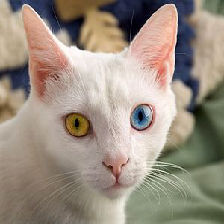

In [21]:
#Pobieramy zdjęcie i dostosowujemy je do wymogu modelu 224x224
url_img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/June_odd-eyed-cat_cropped.jpg/300px-June_odd-eyed-cat_cropped.jpg'
response = requests.get(url_img)
img = Image.open( BytesIO(response.content))
img = img.resize((224,224))
img

In [33]:
#Konwertujemy zdjecie do macierzy
X = image.img_to_array(img)
#dodajemy jeszcze jeden wymiar X bo tego oczekuje model
X = np.expand_dims(X, axis=0)
X.shape

(1, 224, 224, 3)

In [37]:
#Sprawdzamy co jest na zdjęciu za pomocą modelu
y_pred = model.predict(X)

In [36]:
#wyświetlamy 3 najbardziej trafne wyniki
decode_predictions(y_pred, top=3)

40960/35363 [==================================] - 0s 4us/step


[[('n02123597', 'Siamese_cat', 0.7722268),
  ('n02124075', 'Egyptian_cat', 0.13807856),
  ('n02127052', 'lynx', 0.041085254)]]